# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

import api_keys

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude --> do this for the second section of the HW
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [149]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [257]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#units
units = "imperial"

#build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="

query_url = f"{url}appid={api_key}&units={units}&q="

#api_key = weather_api_key

#api key
#api_key = "a32ced28507e51a58b1e21425d1f6817"

#lists to hold response info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#log print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Start the counter 
counter = 1

#loop through the list of cities and perform a request for data on each
#Loop through the cities in the city list 
for city in cities: 
    try:
        response = requests.get(query_url + city).json()
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]  
        
        print(f"Processing Record {counter}| {city}")
        counter = counter +1

    except:
        print("City not found. Skipping...")
    continue
        




Beginning Data Retrieval
-------------------------------
Processing Record 1| thompson
Processing Record 2| kapaa
Processing Record 3| dinar
Processing Record 4| tuktoyaktuk
Processing Record 5| horta
Processing Record 6| saint-philippe
Processing Record 7| anloga
Processing Record 8| ushuaia
Processing Record 9| vila franca do campo
Processing Record 10| verkhoyansk
Processing Record 11| busselton
Processing Record 12| asyut
Processing Record 13| rikitea
Processing Record 14| shahrud
Processing Record 15| hasaki
Processing Record 16| chokurdakh
Processing Record 17| doha
Processing Record 18| yellowknife
City not found. Skipping...
Processing Record 19| monforte de lemos
Processing Record 20| avarua
Processing Record 21| antalaha
Processing Record 22| kruisfontein
Processing Record 23| new norfolk
Processing Record 24| banyo
Processing Record 25| poltar
Processing Record 26| hilo
Processing Record 27| anito
Processing Record 28| hithadhoo
Processing Record 29| albany
Processing Record

Processing Record 242| vaitape
Processing Record 243| gryazovets
City not found. Skipping...
Processing Record 244| chumikan
Processing Record 245| pemangkat
Processing Record 246| mogadouro
Processing Record 247| pevek
Processing Record 248| celestun
Processing Record 249| bad neuenahr-ahrweiler
Processing Record 250| toora-khem
Processing Record 251| meulaboh
City not found. Skipping...
Processing Record 252| tura
Processing Record 253| nyurba
Processing Record 254| finschhafen
Processing Record 255| putina
Processing Record 256| mednogorsk
Processing Record 257| lata
Processing Record 258| brae
Processing Record 259| altagracia de orituco
Processing Record 260| tuatapere
Processing Record 261| codrington
Processing Record 262| porto novo
City not found. Skipping...
Processing Record 263| oktyabrskoye
Processing Record 264| the valley
Processing Record 265| half moon bay
Processing Record 266| pemba
Processing Record 267| port hedland
Processing Record 268| tabou
Processing Record 26

City not found. Skipping...
Processing Record 478| lucea
Processing Record 479| zaraza
Processing Record 480| san quintin
Processing Record 481| conde
Processing Record 482| touros
Processing Record 483| severo-kurilsk
Processing Record 484| hohhot
Processing Record 485| camabatela
Processing Record 486| jinxiang
Processing Record 487| noyabrsk
Processing Record 488| bahia blanca
Processing Record 489| eyrarbakki
Processing Record 490| terrace bay
Processing Record 491| cayenne
Processing Record 492| tyrma
Processing Record 493| viedma
Processing Record 494| samut prakan
Processing Record 495| sulangan
Processing Record 496| iskateley
Processing Record 497| at-bashi
Processing Record 498| ratnagiri
Processing Record 499| merrill
Processing Record 500| shakhtinsk
Processing Record 501| plettenberg bay
Processing Record 502| paamiut
Processing Record 503| pochutla
Processing Record 504| abong mbang
City not found. Skipping...
Processing Record 505| nianzishan
Processing Record 506| taung

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [258]:


#display the lists into a dataframe
city_df = pd.DataFrame({"City": city_name ,"Lat": lat,"Lng":lng, 
"Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
"Country": country, "Date": date})
city_df

#export city data into csv
city_df.to_csv('citydata.csv')


In [259]:
#get statistical information about the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.139269,16.290220,50.813843,71.121739,53.794783,7.882035,1.612989e+09
std,33.057436,89.225946,32.484616,20.200367,39.170043,5.598220,8.094118e+01
min,-54.800000,-175.200000,-31.000000,13.000000,0.000000,0.470000,1.612989e+09
25%,-8.303650,-63.027250,30.200000,60.000000,15.500000,3.860000,1.612989e+09
50%,22.285500,22.417800,63.930000,77.000000,65.000000,6.910000,1.612989e+09
75%,46.659450,92.195950,77.000000,87.000000,91.000000,10.360000,1.612989e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,43.730000,1.612989e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [260]:
#remove cites where humidity is > 100 --> create new df with cities less than 100
#based on the describe method results, the max is 100 so there isnt any city to be removed
filtered_city_df = city_df[city_df['Humidity'] < 100]
filtered_city_df
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-18.4,63,75,6.91,CA,1612989184
1,Kapaa,22.0752,-159.3190,73.4,53,20,11.50,US,1612989184
2,Dinar,38.0650,30.1656,42.8,75,0,5.75,TR,1612989376
3,Tuktoyaktuk,69.4541,-133.0374,-27.4,68,20,12.66,CA,1612989184
4,Horta,38.5333,-28.6333,60.8,63,40,26.46,PT,1612989185
...,...,...,...,...,...,...,...,...,...
570,Daşoguz,41.8363,59.9666,30.2,74,0,6.91,TM,1612989143
571,Kidal,18.4411,1.4078,74.7,16,18,7.81,ML,1612989375
572,Stromness,58.9650,-3.2960,33.8,80,75,5.75,GB,1612989375
573,Kinnelon,41.0018,-74.3671,35.6,35,1,5.06,US,1612989375


In [262]:
#Get the indices of cities that have humidity over 100%.
#Based on the describe method result there arent any cities with humidity over 100

humidity_over_100_city_df = city_df[city_df['Humidity']>100].index.tolist()
print(humidity_over_100_city_df)

[]


In [263]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#filtered_city_df(inpalce=False)
clean_city_data = filtered_city_df
clean_city_data



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-18.4,63,75,6.91,CA,1612989184
1,Kapaa,22.0752,-159.3190,73.4,53,20,11.50,US,1612989184
2,Dinar,38.0650,30.1656,42.8,75,0,5.75,TR,1612989376
3,Tuktoyaktuk,69.4541,-133.0374,-27.4,68,20,12.66,CA,1612989184
4,Horta,38.5333,-28.6333,60.8,63,40,26.46,PT,1612989185
...,...,...,...,...,...,...,...,...,...
570,Daşoguz,41.8363,59.9666,30.2,74,0,6.91,TM,1612989143
571,Kidal,18.4411,1.4078,74.7,16,18,7.81,ML,1612989375
572,Stromness,58.9650,-3.2960,33.8,80,75,5.75,GB,1612989375
573,Kinnelon,41.0018,-74.3671,35.6,35,1,5.06,US,1612989375


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis: As latitude increases, temperature tends to drop. 

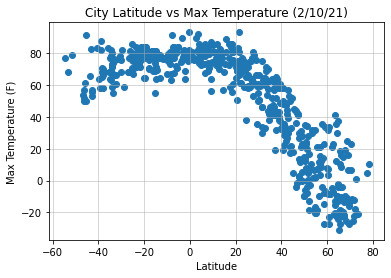

<Figure size 432x288 with 0 Axes>

In [269]:
#Latitude vs Temperature Scatter Plot - Matplotlib, 
#figure out how to put the date in the title

#plot style

#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

lat_vs_temp_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot

Analysis: As latitude gets higher, so does the humidity. Latitudes at the extremes have lower humidity. 

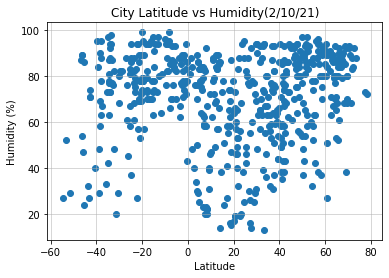

<Figure size 432x288 with 0 Axes>

In [270]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


lat_vs_humidity_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot

Analysis: Cloudiness data doest have a clear and obvious relationship to latitude. The data points are widely spread across the latitude with no real pattern. 

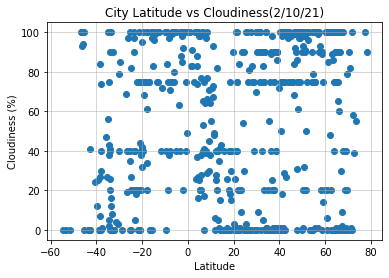

<Figure size 432x288 with 0 Axes>

In [271]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


lat_vs_cloud_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

Analysis: Wind speed data doest have a clear and obvious relationship to latitude, most of the data points are under 15 mph regardless of latitude. 

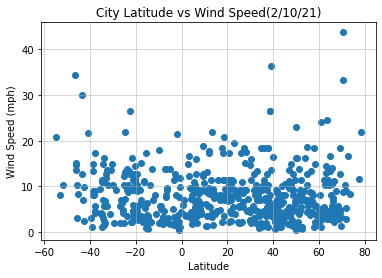

<Figure size 432x288 with 0 Axes>

In [272]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#create scatter plot
lat_vs_wind_speed_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [228]:
#linear regress

#northern Hemisphere - Max Temp vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
north_hemi_df = city_df[city_df['Lat']>=0]
north_hemi_df

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Max Temp'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Analysis: There is a weak correlation between max temperature and latitude in the northern hemisphere with the R square value being 0.17. The higher the latitude, the higher the max temperature tends to be, with enough outliers to affect the strenght of the relationship correlation. 

R squared: 0.1730115519442677
y = 0.44x + 54.69


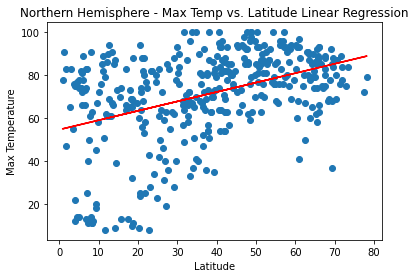

In [297]:
#northern Hemi Plot

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")

# Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()
                           

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Analysis: There is a weak correlation between max temperature and latitude in the southern hemisphere regression analysis with an R squared value of 0.177, very similar to the northern hemisphere R square value. Most of the data points are scattered throughout without any real pattern or relationship. 

R squared: 0.17728936780623547
y = 0.27x + 80.11


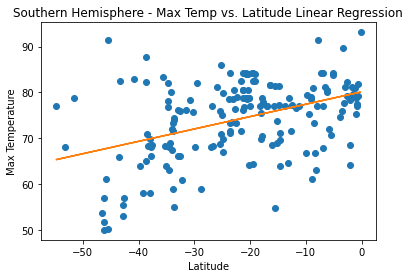

In [281]:
#linear regress

#southern Hemisphere - Max Temp vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Max Temp'])


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Analysis: There is a weak relationship between humidity and latitude in the Northern hemisphere. The lowest humidity values are closer to 0* latitude as well. 

R squared: 0.1730115519442677
y = 0.44x + 54.69


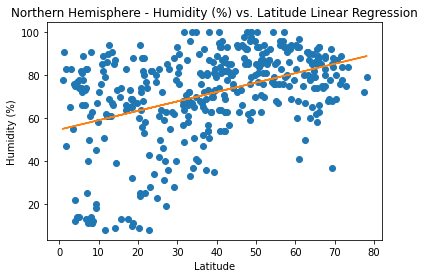

In [298]:
#linear regress

#northern Hemisphere - Humidity vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Humidity'])

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Analysis: There is no real correlation between humidity and latitude in the Southern Hemisphere. Most of the data is pretty spread out, with a slight trend of higher humidity as latitude increases. 

R squared: 0.1254906271772586
y = 0.46x + 85.63


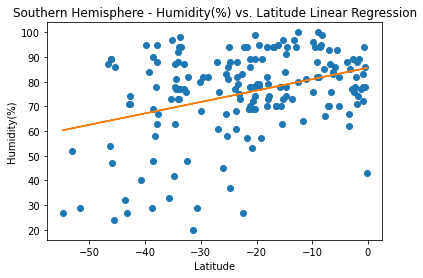

In [309]:
#linear regress

#southern Hemisphere - Humidity vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Humidity'])


plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Analysis: There is a weak correlation between cloudiness and latitude in the Northern Hemisphere. Most of the data points are at the extremes of the cloudiness axis regardless of the latitude value. 

R squared: 0.02515288574804646
y = 0.32x + 42.34


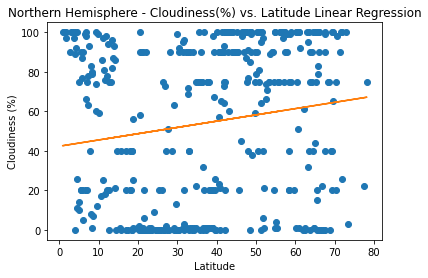

In [310]:
#linear regress

#northern Hemisphere - Cloudiness (%)  vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Cloudiness'])

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Analysis: There isnt a strong relationship between cloudiness and latitude in the Southern hemisphere. The data points are scattered thoughout. 

R squared: 0.20614546388537183
y = 1.3x + 83.77


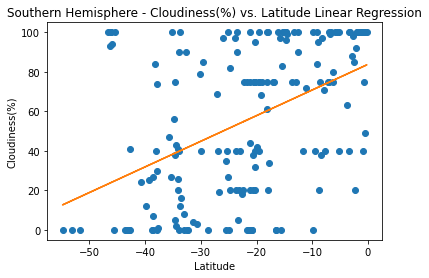

In [312]:
#southern Hemisphere - Cloudiness vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Southern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Cloudiness'])


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Analysis: There is a very strong neutral relationship between wind speed and latitude in the northern hemisphere. 

R squared: 4.029617385018137e-05
y = -0.0x + 3.71


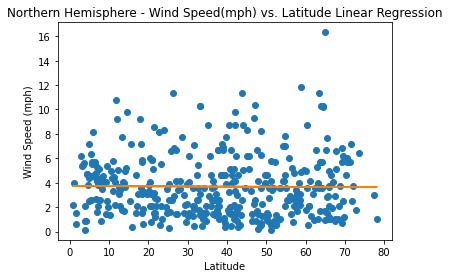

In [316]:
#linear regress

#northern Hemisphere - Wind Speed (%)  vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Wind Speed'])

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")

#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Analysis: There is a weak negative correlation between wind speed and latitude in the Southern hemisphere. 

R squared: 0.09129219590713976
y = -0.13x + 5.23


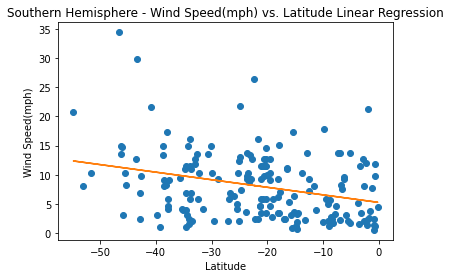

In [315]:
#southern Hemisphere - Wind Speed vs Latitude Linear Regression
#1. create southern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Southern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Wind Speed'])


plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()